In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-in-the-dat/sample_submission.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/test.csv


# **EDA**

In [2]:
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [3]:
#컴럼명이 왜이래.? ... 그래서 책에서 데이터 피처 요약표를 만든거구나..
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   300000 non-null  int64 
 1   bin_1   300000 non-null  int64 
 2   bin_2   300000 non-null  int64 
 3   bin_3   300000 non-null  object
 4   bin_4   300000 non-null  object
 5   nom_0   300000 non-null  object
 6   nom_1   300000 non-null  object
 7   nom_2   300000 non-null  object
 8   nom_3   300000 non-null  object
 9   nom_4   300000 non-null  object
 10  nom_5   300000 non-null  object
 11  nom_6   300000 non-null  object
 12  nom_7   300000 non-null  object
 13  nom_8   300000 non-null  object
 14  nom_9   300000 non-null  object
 15  ord_0   300000 non-null  int64 
 16  ord_1   300000 non-null  object
 17  ord_2   300000 non-null  object
 18  ord_3   300000 non-null  object
 19  ord_4   300000 non-null  object
 20  ord_5   300000 non-null  object
 21  day     300000 non-null  int64 
 

In [4]:
#train하고 차이는 target column만 없음
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 300000 to 499999
Data columns (total 23 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   bin_0   200000 non-null  int64 
 1   bin_1   200000 non-null  int64 
 2   bin_2   200000 non-null  int64 
 3   bin_3   200000 non-null  object
 4   bin_4   200000 non-null  object
 5   nom_0   200000 non-null  object
 6   nom_1   200000 non-null  object
 7   nom_2   200000 non-null  object
 8   nom_3   200000 non-null  object
 9   nom_4   200000 non-null  object
 10  nom_5   200000 non-null  object
 11  nom_6   200000 non-null  object
 12  nom_7   200000 non-null  object
 13  nom_8   200000 non-null  object
 14  nom_9   200000 non-null  object
 15  ord_0   200000 non-null  int64 
 16  ord_1   200000 non-null  object
 17  ord_2   200000 non-null  object
 18  ord_3   200000 non-null  object
 19  ord_4   200000 non-null  object
 20  ord_5   200000 non-null  object
 21  day     200000 non-null  int

In [5]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [6]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [7]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [8]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [9]:
train

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,0,T,N,Red,Trapezoid,Snake,India,Oboe,...,e027decef,1,Contributor,Freezing,k,K,dh,3,8,0
299996,0,0,0,F,Y,Green,Trapezoid,Lion,Russia,Piano,...,80f1411c8,2,Novice,Freezing,h,W,MO,3,2,0
299997,0,0,0,F,Y,Blue,Star,Axolotl,Russia,Oboe,...,314dcc15b,3,Novice,Boiling Hot,o,A,Bn,7,9,1


In [10]:
test

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [11]:
train.dtypes

bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [12]:
# 확인
summary = pd.DataFrame(train.dtypes, columns = ['data_type'])
display(summary)

,data_type
bin_0,int64
bin_1,int64
bin_2,int64
bin_3,object
bin_4,object
nom_0,object
nom_1,object
nom_2,object
nom_3,object
nom_4,object


In [13]:
summary = pd.DataFrame(train.dtypes, columns = ['data_type'])
display(summary.reset_index())

,index,data_type
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object
5,nom_0,object
6,nom_1,object
7,nom_2,object
8,nom_3,object
9,nom_4,object


In [14]:
train.isnull().sum()

bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64

In [15]:
train.nunique()

bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1220
nom_8      2215
nom_9     11981
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       192
day           7
month        12
target        2
dtype: int64

In [16]:
train.loc[0]

bin_0               0
bin_1               0
bin_2               0
bin_3               T
bin_4               Y
nom_0           Green
nom_1        Triangle
nom_2           Snake
nom_3         Finland
nom_4         Bassoon
nom_5       50f116bcf
nom_6       3ac1b8814
nom_7       68f6ad3e9
nom_8       c389000ab
nom_9       2f4cb3d51
ord_0               2
ord_1     Grandmaster
ord_2            Cold
ord_3               h
ord_4               D
ord_5              kr
day                 2
month               2
target              0
Name: 0, dtype: object

In [17]:
train.loc[0].values

array([0, 0, 0, 'T', 'Y', 'Green', 'Triangle', 'Snake', 'Finland',
       'Bassoon', '50f116bcf', '3ac1b8814', '68f6ad3e9', 'c389000ab',
       '2f4cb3d51', 2, 'Grandmaster', 'Cold', 'h', 'D', 'kr', 2, 2, 0],
      dtype=object)

In [18]:
def resumetable(df):
    print(f"data shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns = ['data_type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'feature'})
    summary['null_count'] = df.isnull().sum().values
    summary['unique_count'] = df.nunique().values
    summary['first_value'] = df.loc[0].values
    summary['second_value'] = df.loc[1].values
    summary['third_value'] = df.loc[2].values
    
    return summary

resumetable(train)

data shape: (300000, 24)


,feature,data_type,null_count,unique_count,first_value,second_value,third_value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


**시각화**

In [19]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

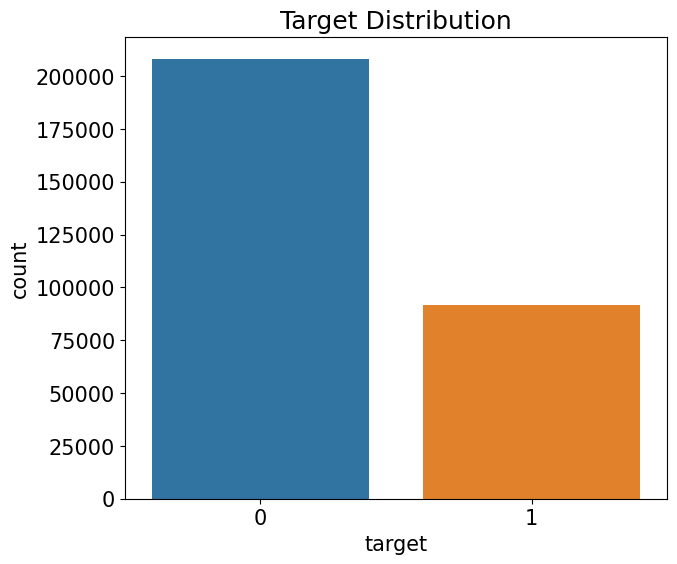

In [20]:
mpl.rc('font', size = 15)
plt.figure(figsize = (7,6))

ax = sns.countplot(x = 'target', data = train)
ax.set_title('Target Distribution')

In [21]:
print(ax.patches)

<Axes.ArtistList of 2 patches>


In [22]:
rectangle = ax.patches[0]
print("사각형 높이:", rectangle.get_height())
print("사각형 너비:", rectangle.get_width())
print("사각형 왼쪽 테두리의 x축 위치:", rectangle.get_x())

사각형 높이: 208236.0
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [23]:
#ax.patches[2]

In [24]:
print("텍스트 위치의 x좌표:", rectangle.get_x() + rectangle.get_width() / 2.0)
print("텍스트 위치의 y좌표:", rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 208536.0


Text(0.5, 1.0, 'Target Distribution')

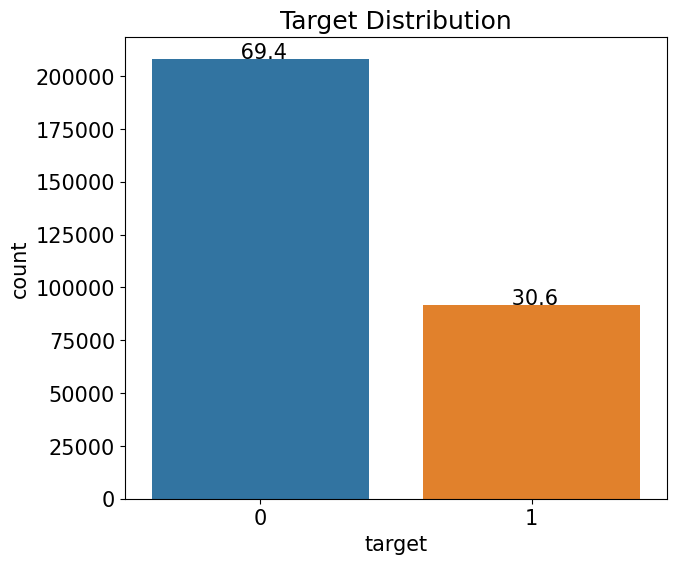

In [25]:
def write_percent(ax, total_size):
    for patch in ax.patches: # 여기서는 2개다
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height / total_size * 100
        
        ax.text(x = left_coord + width / 2.0,
               y = height + total_size * 0.001,
               s = f'{percent: 1.1f}',
               ha = 'center')
        
plt.figure(figsize = (7,6))

ax = sns.countplot(x = 'target', data = train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

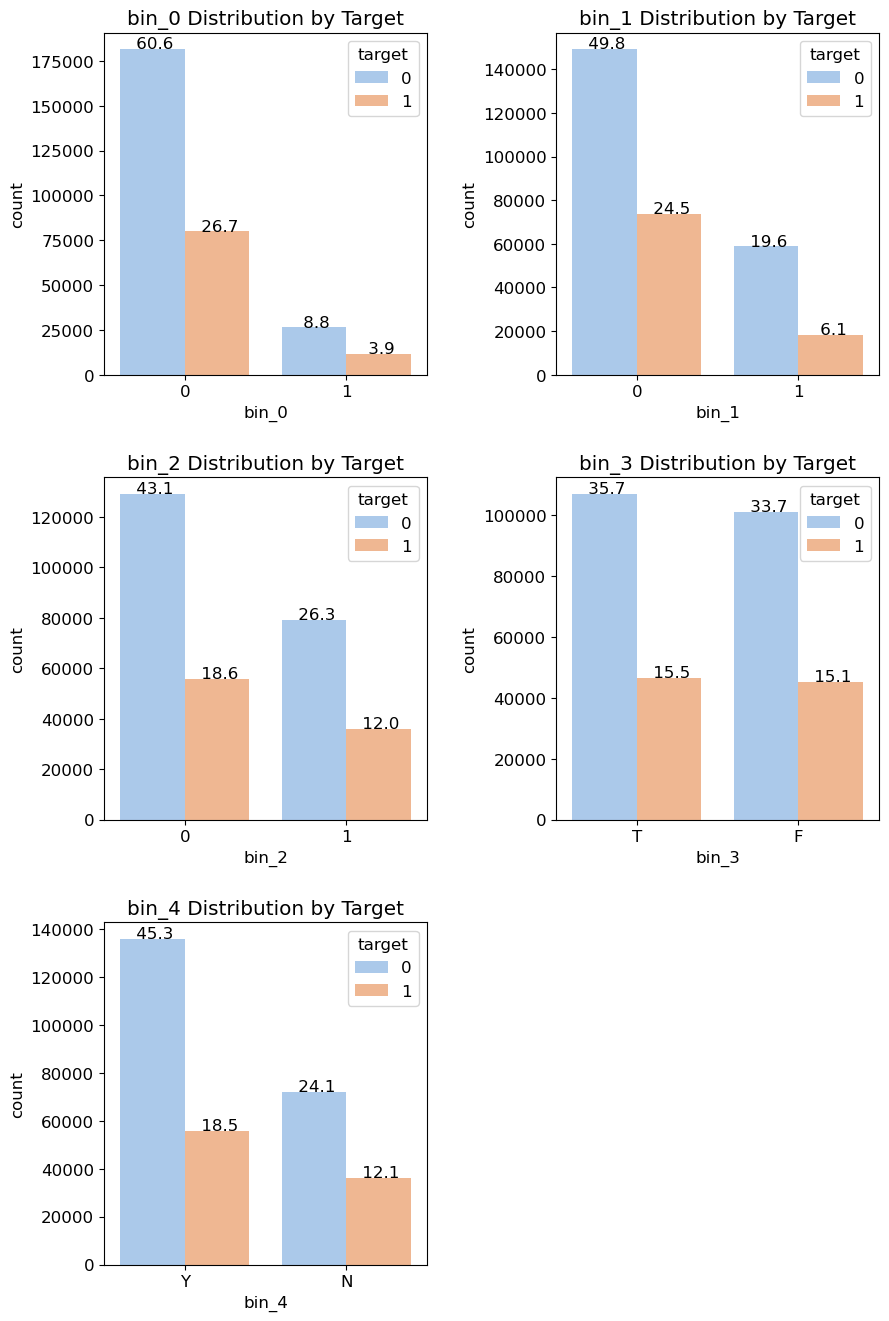

In [26]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size = 12)
grid = gridspec.GridSpec(3, 2)
plt.figure(figsize = (10, 16))
plt.subplots_adjust(wspace = 0.4, hspace = 0.3)

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x = feature,
                data = train,
                hue = 'target',
                palette = 'pastel', # 이색깔 이쁜듯..나중에도 써먹자.
                ax = ax)
    
    ax.set_title(f'{feature} Distribution by Target')
    write_percent(ax, len(train))

명목형

In [27]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [28]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize = 'index') * 100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [29]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [30]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize = 'index') * 100
    crosstab = crosstab.reset_index()
    return crosstab

In [31]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [32]:
display(crosstab[0])
display(crosstab[1])

0    75.820976
1    67.285478
2    64.894827
Name: 0, dtype: float64

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [33]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x = feature, y = 1, data = crosstab,
                       order = crosstab[feature].values,
                       color = 'red')
                       #legend = False) #https://seaborn.pydata.org/generated/seaborn.pointplot.html
    ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max() * 1.1)
    ax2.set_ylabel('Target 1 Ratio(%)')

In [34]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size = (15, 20)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace = 0.45, hspace = 0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x = feature, data = df,
                     order = crosstab[feature].values,
                     color = 'skyblue',
                     ax = ax)
        
        write_percent(ax, len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f'{feature} Distribution')

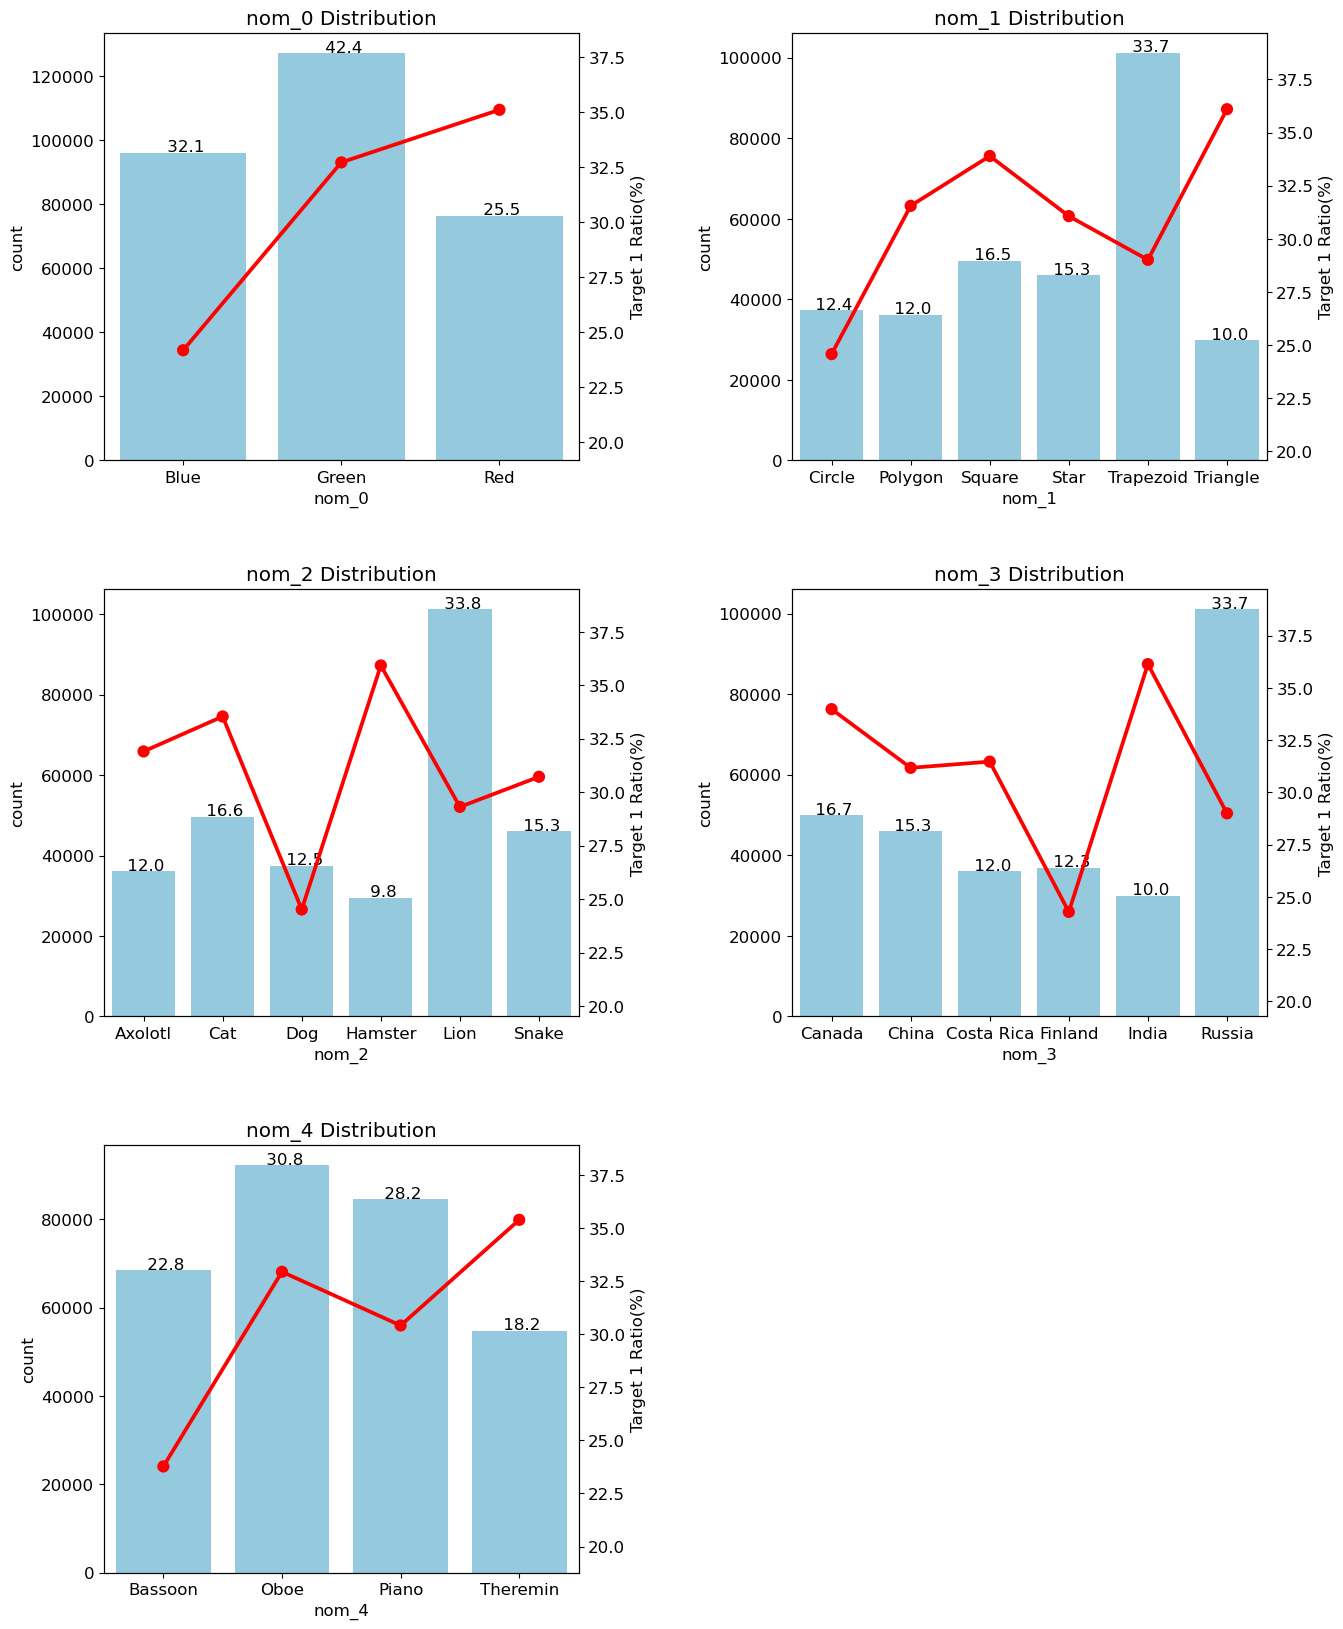

In [35]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']

plot_cat_dist_with_true_ratio(train, nom_features, num_rows= 3, num_cols = 2)

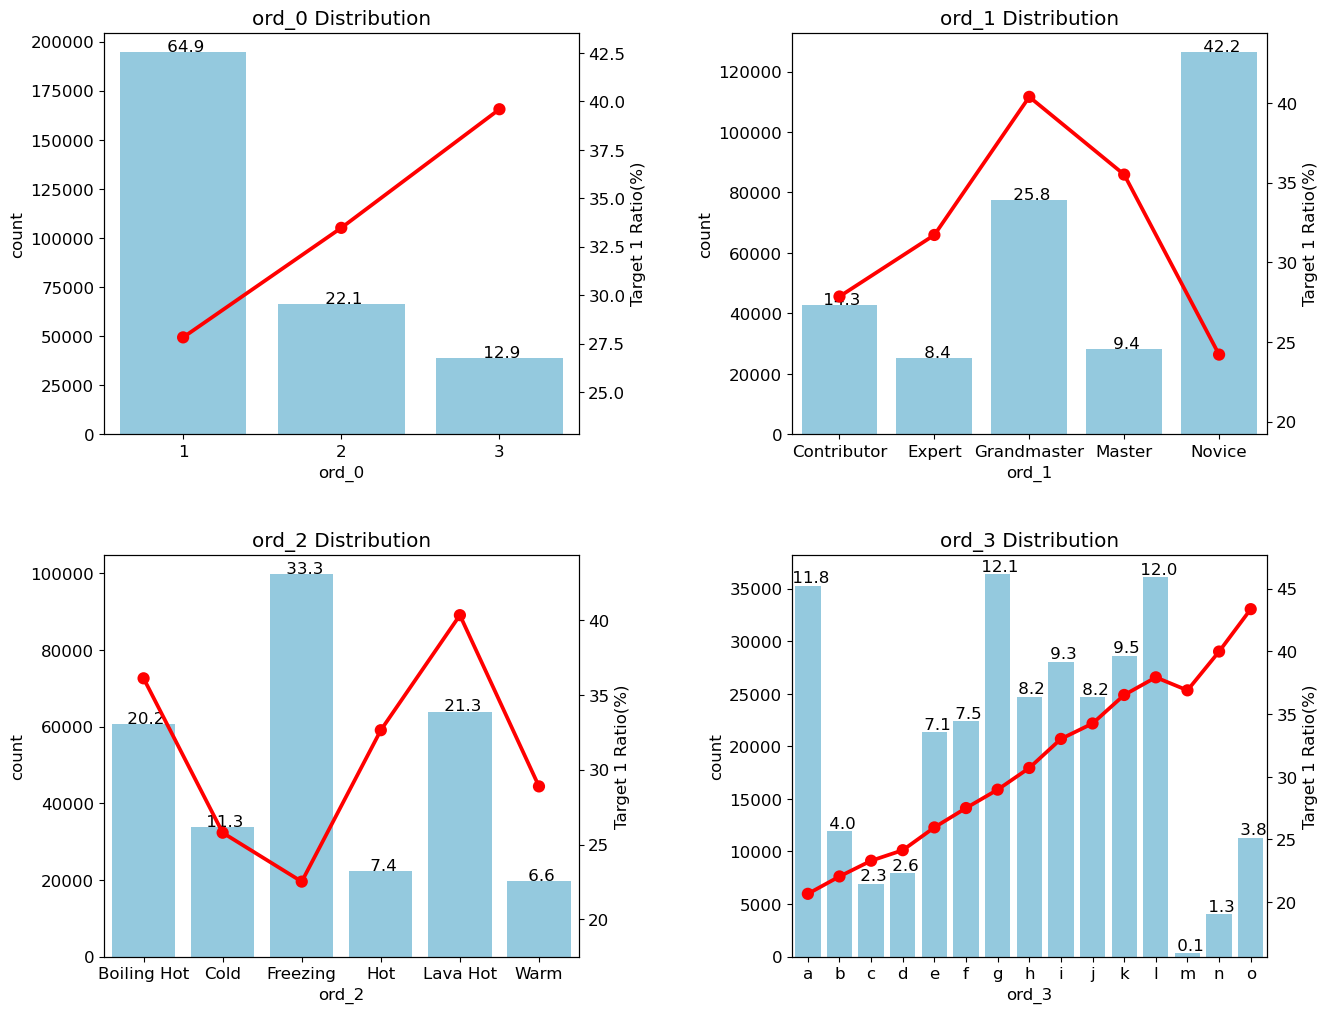

In [36]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3']
plot_cat_dist_with_true_ratio(train, ord_features, num_rows = 2, num_cols = 2, size = (15, 12))

In [37]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

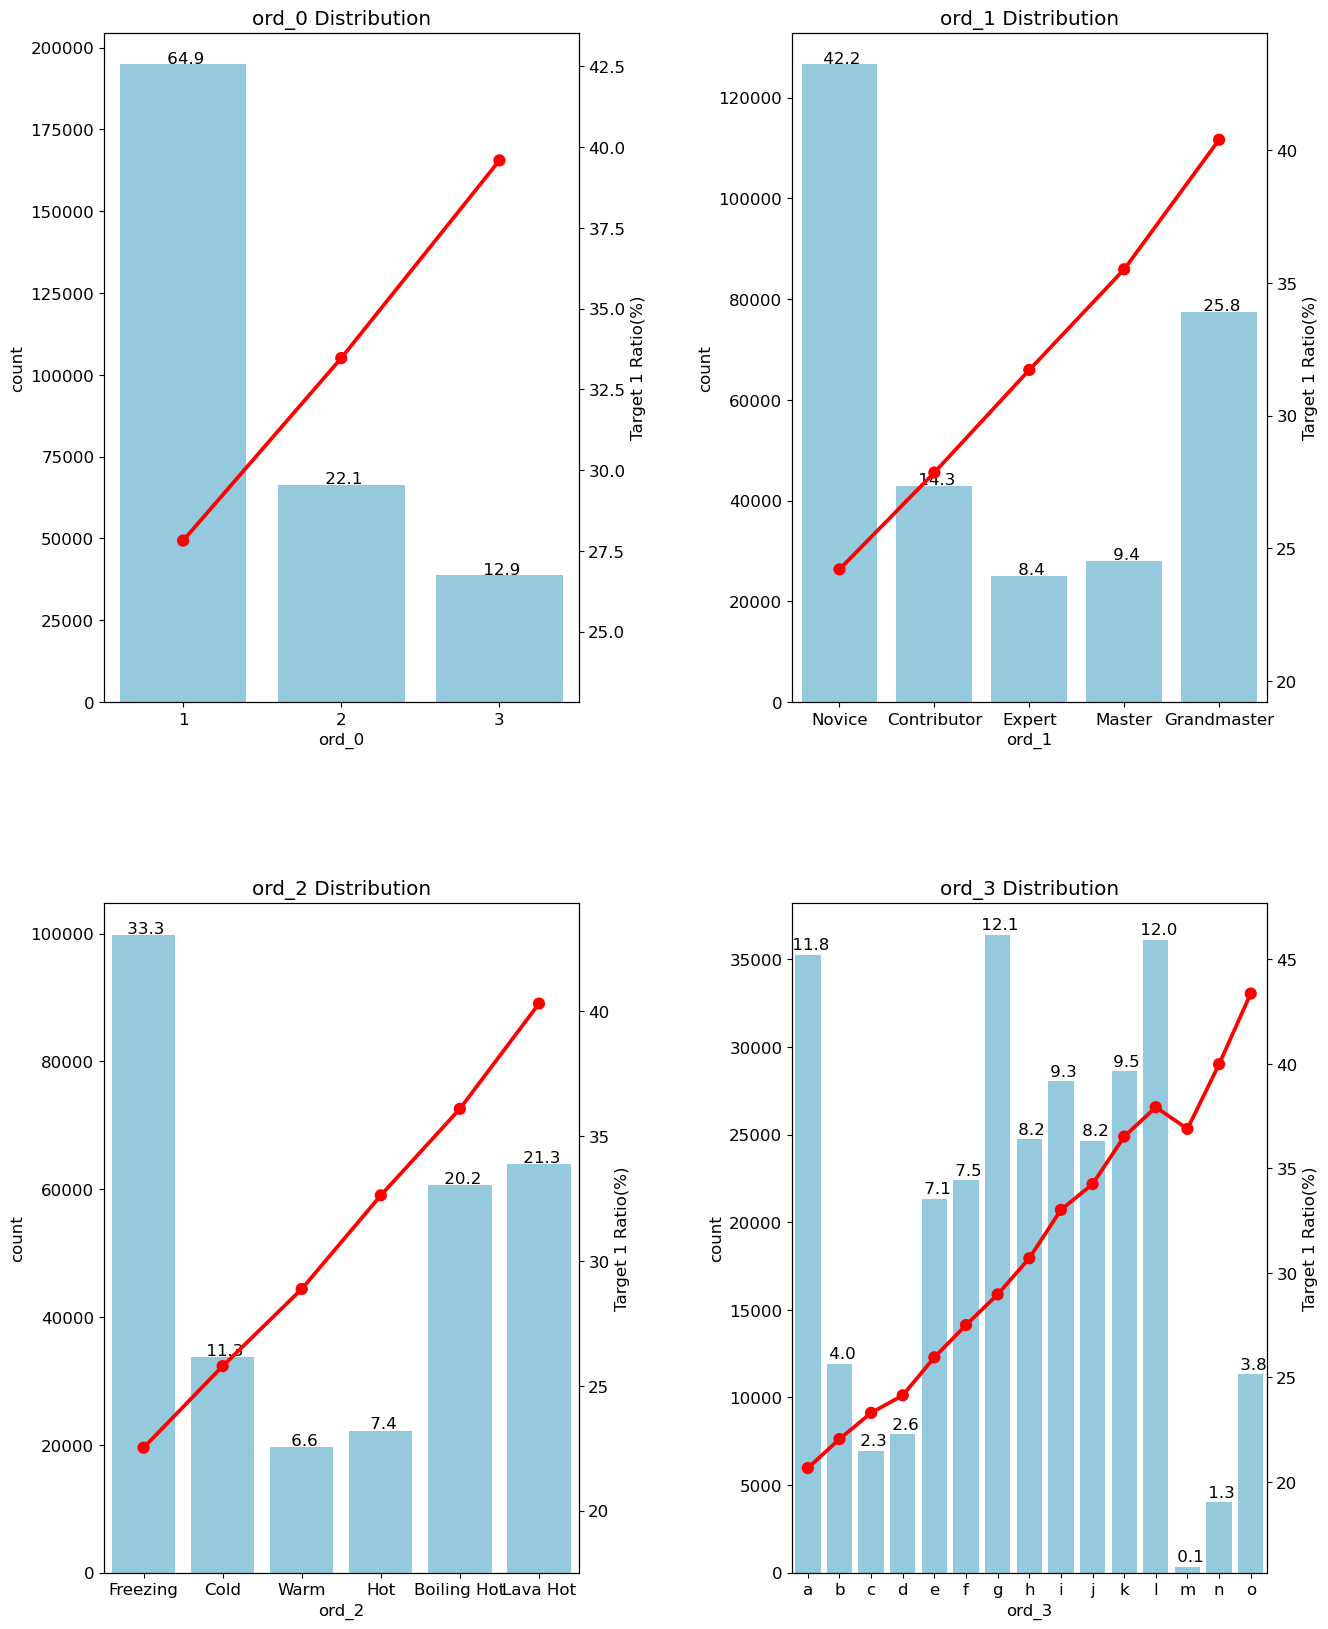

In [38]:
plot_cat_dist_with_true_ratio(train, ord_features,
                             num_rows = 2, num_cols = 2, size = (15, 20))

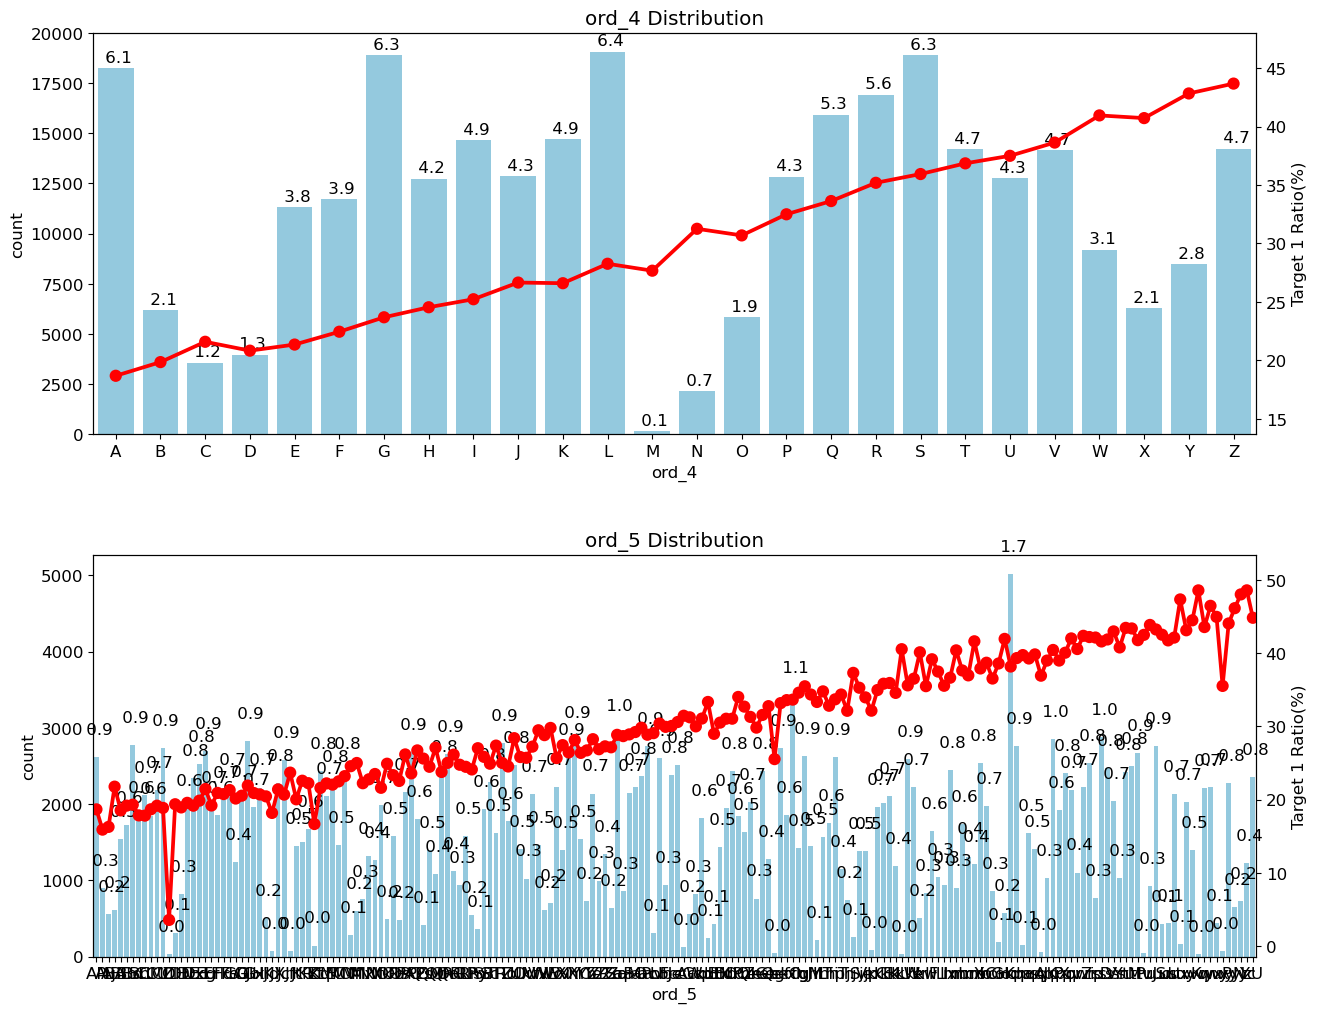

In [39]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'],
                             num_rows = 2, num_cols = 1, size = (15, 12))

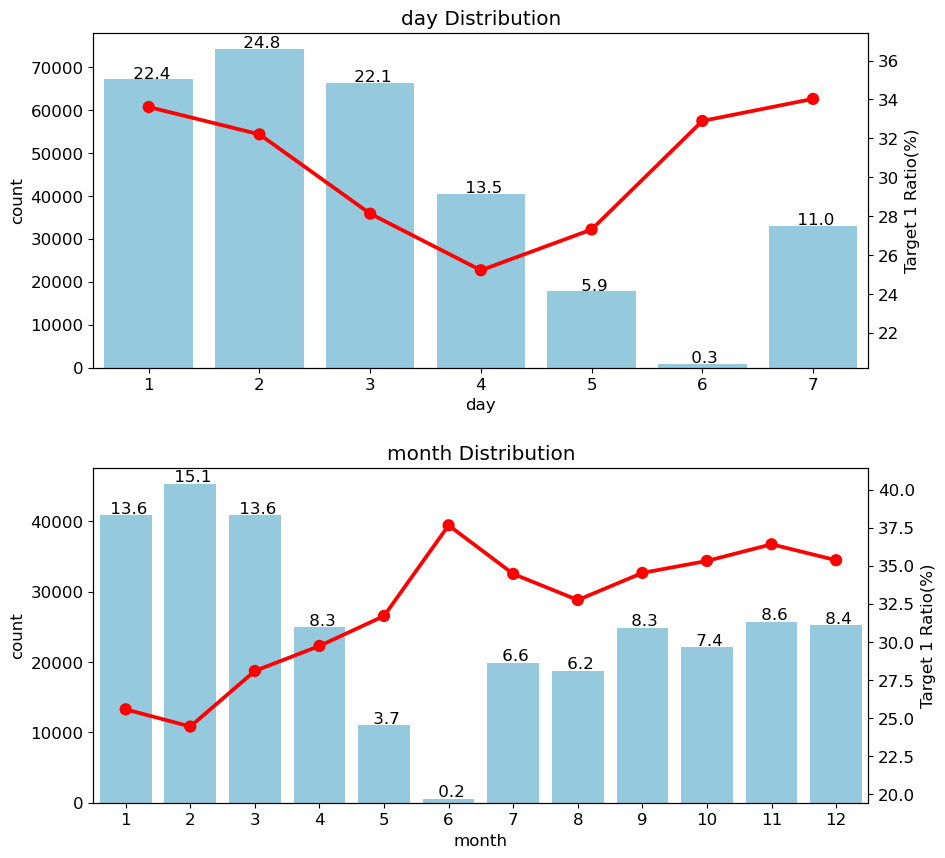

In [40]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, num_rows = 2, num_cols = 1,
                             size = (10, 10))

# **모델**

In [41]:
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [42]:
# 6장처럼 train, test 합쳤다가 다시 분리
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [43]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [44]:
num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y,
                                                     test_size = 0.1,
                                                     stratify = y,
                                                     random_state = 10)

훈련

In [46]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000, random_state = 42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
logistic_model.predict_proba(X_valid)

array([[0.23265324, 0.76734676],
       [0.91403908, 0.08596092],
       [0.8303673 , 0.1696327 ],
       ...,
       [0.24860685, 0.75139315],
       [0.49451672, 0.50548328],
       [0.95655532, 0.04344468]])

In [48]:
logistic_model.predict(X_valid)

array([1, 0, 0, ..., 1, 1, 0])

In [49]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'ROC AUC : {roc_auc:.4f}')

ROC AUC : 0.7965


In [51]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]

In [52]:
y_preds

array([0.30847177, 0.69911902, 0.06801307, ..., 0.40606402, 0.49211264,
       0.18615401])

In [53]:
submission['target'] = y_preds

In [54]:
submission

,target
id,
300000,0.308472
300001,0.699119
300002,0.068013
300003,0.445399
300004,0.893172
...,...
499995,0.311686
499996,0.142330
499997,0.406064


In [55]:
submission.to_csv('submissions.csv')

# 성능개선!!

In [56]:
test

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,...,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,...,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,...,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,...,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,...,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [58]:
import pandas as pd

data_path = '/kaggle/input/cat-in-the-dat/'

train = pd.read_csv(data_path + 'train.csv', index_col = 'id')
test = pd.read_csv(data_path + 'test.csv', index_col = 'id')

submission = pd.read_csv(data_path + 'sample_submission.csv', index_col = 'id')

In [59]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis = 1)

In [60]:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

In [61]:
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [63]:
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

In [64]:
nom_features = ['nom_' + str(i) for i in range(10)]

In [65]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [66]:
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
encoded_nom_matrix

<500000x16276 sparse matrix of type '<class 'numpy.float64'>'
	with 5000000 stored elements in Compressed Sparse Row format>

In [67]:
all_data = all_data.drop(nom_features, axis = 1)

In [68]:
date_features = ['day', 'month']
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis = 1)
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [71]:
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,
0,0,0,0,1,1,2,4,1,7.0,3.0,136.0
1,0,1,0,1,1,1,4,3,0.0,0.0,93.0
2,0,0,0,0,1,1,2,5,7.0,17.0,31.0
3,0,1,0,0,1,1,4,4,8.0,3.0,134.0
4,0,0,0,0,0,1,4,0,0.0,17.0,158.0
...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,0,0,1,0,5,9.0,0.0,25.0
499996,1,0,0,0,1,1,1,5,5.0,18.0,17.0
499997,0,1,1,1,1,1,0,4,6.0,21.0,66.0


In [74]:
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [75]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                              encoded_nom_matrix,
                              encoded_date_matrix],
                             format = 'csr')

In [76]:
all_data_sprs

<500000x16306 sparse matrix of type '<class 'numpy.float64'>'
	with 9163718 stored elements in Compressed Sparse Row format>

In [77]:
num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target']

In [78]:
'''
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size = 0.1,
                                                     stratify = y,
                                                     random_state = 10)
'''

In [82]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000],
            'solver':['liblinear'], 'random_state':[42]}


CPU times: user 27 µs, sys: 16 µs, total: 43 µs
Wall time: 47 µs


In [83]:
gridsearch_logistic_model = GridSearchCV(estimator = logistic_model,
                                        param_grid = lr_params,
                                        scoring = 'roc_auc',
                                        cv = 5)

gridsearch_logistic_model.fit(X_train, y_train)

print(gridsearch_logistic_model.best_params_)

{'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [84]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

In [87]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.8045


In [88]:
y_preds = gridsearch_logistic_model.best_estimator_.predict_proba(X_test)[:,1]

submission['target'] = y_preds
submission.to_csv('submission.csv')